In [5]:
import pandas as pd
import numpy as np
import gspread
import json

In [6]:
gc = gspread.service_account(filename='creds/lifts-service.json')


In [7]:
sheet = gc.open_by_key('1Y6cVf0_oyY4xDz_Fq_NXcMjxpsmGClZCt8hDw3RIqkM')
all_worksheets = sheet.worksheets()
all_worksheets

[<Worksheet '04/01/2022' id:0>,
 <Worksheet '29/01/22' id:307277220>,
 <Worksheet '13/02/22' id:167887834>,
 <Worksheet '28/02/22' id:1331411127>,
 <Worksheet '15/03/22 DELOAD' id:585663713>,
 <Worksheet '28/03/22' id:661285306>,
 <Worksheet '11/04/22' id:1533557140>,
 <Worksheet '04/05/22' id:789390216>,
 <Worksheet '17/05/2022' id:1263314912>,
 <Worksheet '04/06/2022' id:1037833865>,
 <Worksheet '19/06/2022' id:1070839500>,
 <Worksheet '02/07/2022' id:1830989469>,
 <Worksheet '17/07/2022' id:1304829489>,
 <Worksheet '30/07/2022' id:286974438>,
 <Worksheet '17/08/2022' id:412489772>]

In [8]:
exercises = set()
for ws in all_worksheets:
    exe = ws.col_values(1)
    for e in exe:

        exercises.add(e)

exercises = list(exercises)
exercises_only = []

[exercises_only.append(ex) for ex in list(filter(None, exercises)) if ex[0].isdigit()]

exercises_only.sort()
exercises_only

['2x10-12 Leg Curls',
 '2x10-12 Leg Extensions',
 '2x10-15 Chest Flys - DB',
 '2x10-15 Chest Flys - db',
 '2x10-15 Chest Flys - machine',
 '2x12-15 Bicep Isolation - DB Hammer',
 '2x12-15 Bicep Isolation - DB Waiter curl',
 '2x12-15 Dips',
 '2x12-15 Tricep Isolation - Tricep Pushdowns',
 '2x12-15 Tricep Isolation - ez bar skull crusher',
 '3x10-12 Bicep Isolation - DB curl (incline bench)',
 '3x10-12 Bicep Isolation - ez Bar Curl',
 '3x10-12 Tricep Isolation - Dips',
 '3x10-12 Tricep Isolation - Tricep Pushdown',
 '3x10-12 Tricep Isolation - ez bar skull crushers',
 '3x10-15 Lateral Raises - Cable',
 '3x10-15 Lateral Raises - DB',
 '3x10-15 Rear Delts - Face Pulls',
 '3x12-15 Bicep Isolation - DB Waiter curl',
 '3x5-8 Bench Press',
 '3x5-8 Rows - Barbell',
 '3x5-8 Rows - Pendlay',
 '3x6-8 BB Hip Thrusts',
 '3x6-8 Bench Press (close grip)',
 '3x6-8 Incline Press - Barbell',
 '3x6-8 Incline Press - Smith',
 '3x6-8 Leg Press',
 '3x6-8 OHP',
 '3x6-8 Pull Ups',
 '3x6-8 RDL - Barbell',
 '3x6

In [9]:
import time

li = []

for ex in exercises_only: 

    record = {
        "exercise": ex,
        "progress": []
    }
    print(ex)
    time.sleep(30)
    for ws in all_worksheets:
        result_row_cell = ws.findall(ex)
        for cell in result_row_cell:
            row = ws.row_values(cell.row)
            weight = row[1]
            reps = list()
            for i in range(2, 2+int(row[0][0])):
                try:
                    reps.append(row[i])
                except(IndexError):
                    print('No value for rep_number {rep_number} for {exercise} on {worksheet}'.format(rep_number=str(i-1), exercise=ex, worksheet=ws.title))
                    pass

            record["progress"].append({
                "weight": weight,
                "reps": reps,
                "date": ws.title
            })

    li.append(record)

li  

2x10-12 Leg Curls
No value for rep_number 1 for 2x10-12 Leg Curls on 13/02/22
No value for rep_number 2 for 2x10-12 Leg Curls on 13/02/22
No value for rep_number 1 for 2x10-12 Leg Curls on 15/03/22 DELOAD
No value for rep_number 2 for 2x10-12 Leg Curls on 15/03/22 DELOAD
No value for rep_number 1 for 2x10-12 Leg Curls on 04/05/22
No value for rep_number 2 for 2x10-12 Leg Curls on 04/05/22
No value for rep_number 1 for 2x10-12 Leg Curls on 17/05/2022
No value for rep_number 2 for 2x10-12 Leg Curls on 17/05/2022
No value for rep_number 2 for 2x10-12 Leg Curls on 30/07/2022
2x10-12 Leg Extensions
No value for rep_number 1 for 2x10-12 Leg Extensions on 04/05/22
No value for rep_number 2 for 2x10-12 Leg Extensions on 04/05/22
No value for rep_number 2 for 2x10-12 Leg Extensions on 17/05/2022
2x10-15 Chest Flys - DB
2x10-15 Chest Flys - db
2x10-15 Chest Flys - machine
2x12-15 Bicep Isolation - DB Hammer
No value for rep_number 2 for 2x12-15 Bicep Isolation - DB Hammer on 04/05/22
2x12-15 Bic

In [ ]:
import json

li = None
with open ('exercise_history.json','w') as f:
    json.dump(li, f, default=lambda o: o.__dict__, sort_keys=True, indent=2)

In [1]:
from dateutil import parser
from datetime import timedelta
import json

# make dates unique

with open('exercise_history.json') as f:
    li = json.load(f)

for record in li: 
    date = None
    for progress in record["progress"]:
        if progress["date"] == date:
            #handle DELOAD string
            date = date.split(" ")[0]
            dt = parser.parse(date, dayfirst=True)
            progress["date"] = (dt + timedelta(days=7)).strftime("%d/%m/%Y")
            date = progress["date"]
        else:
            date = progress["date"]
            progress["date"] = parser.parse(date.split(" ")[0], dayfirst=True).strftime("%d/%m/%Y")

NameError: name 'json' is not defined

In [ ]:
import pandas as pd

exercises_date_weight_frames = dict()

ex=li[0]
# make a dataframe for each exercise, index = date, col = weight
for ex in li:
    date_weight = {}
    for progress in ex["progress"]:
        date_weight[progress["date"]] = progress["weight"]
    df = pd.DataFrame.from_dict(date_weight, orient='index', columns=["weight"])
    df.rename_axis(index='date', columns='weight')
    exercises_date_weight_frames[ex["exercise"]] = df


exercises_date_weight_frames

{'2x10-12 Leg Curls':            weight
 04/01/2022     43
 11/01/2022     45
 29/01/2022     47
 05/02/2022     48
 13/02/2022     48
 20/02/2022     48
 28/02/2022     48
 07/03/2022     48
 15/03/2022     32
 22/03/2022     32
 28/03/2022     48
 04/04/2022     52
 11/04/2022     52
 18/04/2022     52
 04/05/2022     52
 11/05/2022     52
 17/05/2022     52
 24/05/2022     52
 04/06/2022     52
 11/06/2022     52
 19/06/2022     52
 26/06/2022     52
 02/07/2022     52
 09/07/2022     55
 17/07/2022     55
 24/07/2022     55
 30/07/2022     57
 06/08/2022     55,
 '2x10-12 Leg Extensions':            weight
 04/01/2022     39
 11/01/2022     41
 29/01/2022     45
 05/02/2022     48
 13/02/2022     48
 20/02/2022     48
 28/02/2022     54
 07/03/2022     59
 15/03/2022     45
 22/03/2022     45
 28/03/2022     62
 04/04/2022     63
 11/04/2022     66
 18/04/2022     66
 04/05/2022     66
 11/05/2022     66
 17/05/2022     66
 24/05/2022     66
 04/06/2022     66
 11/06/2022     66
 1

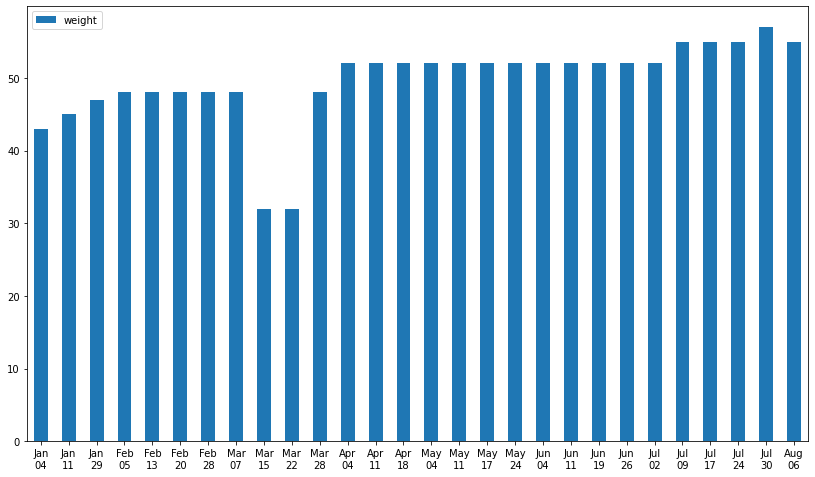

In [ ]:
import matplotlib.pyplot as plt
#graph

plt.close("all")
pd.options.plotting.matplotlib.register_converters = True
df_to_plot = exercises_date_weight_frames["2x10-12 Leg Curls"]
df_to_plot.index = pd.to_datetime(df_to_plot.index, dayfirst=True, infer_datetime_format=True)

df_to_plot = df_to_plot.astype({
    "weight": 'int'})


bar = df_to_plot.plot(kind='bar', rot=0, figsize=(14, 8))
bar.set_xticklabels([i.strftime("%b\n%d") for i in df_to_plot.index])
bar.get_figure().savefig('plots/' + str("2x10-12 Leg Curls"))

In [ ]:
import matplotlib.dates as dates

list_failed = dict()


for key in exercises_date_weight_frames.keys():
    try: 
        plt.close("all")
        df_to_plot = exercises_date_weight_frames[key]
        df_to_plot.index = pd.to_datetime(df_to_plot.index, dayfirst=True, infer_datetime_format=True)
        df_to_plot = df_to_plot.astype({
            "weight": 'float'})


        bar = df_to_plot.plot(figsize=(14, 8), style='.-')

        bar.xaxis.set_major_formatter(dates.DateFormatter('%Y/%m/%d'))
        bar.xaxis.set_major_locator(dates.DayLocator(interval=14))

        bar.get_figure().savefig('plots/' + str(key))
    except ValueError as e:
        list_failed[key] = str(e)
        pass

In [ ]:
list_failed

{'2x12-15 Tricep Isolation - Tricep Pushdowns': "could not convert string to float: '36/41'",
 '3x10-12 Bicep Isolation - ez Bar Curl': "could not convert string to float: '15/17.5'",
 '3x10-12 Tricep Isolation - ez bar skull crushers': "could not convert string to float: '25/22.5'",
 '3x10-15 Lateral Raises - Cable': "could not convert string to float: '52/59'",
 '3x10-15 Lateral Raises - DB': "could not convert string to float: '6/8'",
 '3x10-15 Rear Delts - Face Pulls': "could not convert string to float: '36/19.3'",
 '3x5-8 Bench Press': "could not convert string to float: '47.5/40/45'",
 '3x6-8 BB Hip Thrusts': "could not convert string to float: '130/150/180'",
 '3x6-8 Incline Press - Barbell': "could not convert string to float: '30/25'",
 '3x6-8 Incline Press - Smith': "could not convert string to float: '40/30'",
 '3x6-8 Leg Press': "could not convert string to float: '100/120'",
 '3x6-8 OHP': "could not convert string to float: '30/27.5'",
 '3x6-8 RDL - Barbell': "could not c

In [ ]:
exercises_only = []

[exercises_only.append(ex) for ex in list(filter(None, exercises)) if ex[0].isdigit()]

exercises_only.sort()

no_sets = list()

for ex in exercises_only:
    split = ex.split(" ")
    joined = ' '.join(split[1:])
    no_sets.append(joined)


unique = set(no_sets)
unique = list(unique)
unique.sort()
unique

['Arnie Press',
 'BB Hip Thrusts',
 'Bench Press',
 'Bench Press (close grip)',
 'Bench Press (decline)',
 'Bench Press - DB',
 'Bicep Isolation - DB Hammer',
 'Bicep Isolation - DB Waiter curl',
 'Bicep Isolation - DB curl (incline bench)',
 'Bicep Isolation - ez Bar Curl',
 'Calf Raises - Seated',
 'Calf Raises - Standing',
 'Chest Flys - DB',
 'Chest Flys - machine',
 'DB Shrugs',
 'Dips',
 'Incline Press - Barbell',
 'Incline Press - DB',
 'Incline Press - Smith',
 'Lateral Raises - Cable',
 'Lateral Raises - DB',
 'Leg Curls',
 'Leg Extensions',
 'Leg Press',
 'Lunges',
 'OHP',
 'Pull Downs',
 'Pull Ups',
 'RDL - Barbell',
 'RDL - DB',
 'Rear Delts - Face Pulls',
 'Rows - Barbell',
 'Rows - Cable',
 'Rows - DB',
 'Rows - Pendlay',
 'Split Squat',
 'Split Squat / Lunges',
 'Squats - High Bar',
 'Squats - Low Bar',
 'Tricep Isolation - Tricep Pushdown',
 'Tricep Isolation - Tricep Pushdowns',
 'Tricep Isolation - ez bar skull crusher',
 'Tricep Isolation - ez bar skull crushers',
 '